In [181]:
from io import StringIO
import collections

import numpy as np
import pandas as pd
import pydotplus
import seaborn as sns
from ipywidgets import Image
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn import tree
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
# Часть 1. Игрушечный сет

In [3]:
def create_df(dic, feature_list):
    out = pd.DataFrame(dic)
    out = pd.concat([out, pd.get_dummies(out[feature_list])], axis=1)
    out.drop(feature_list, axis=1, inplace = True)
    out.replace([True, False],[1, 0], inplace=True)
    return out

def intersect_features(train, test):
    common_feat = list(set(train.keys()) & set(test.keys()))
    return train[common_feat], test[common_feat]

In [4]:
features = ['Looks', 'Alcoholic_beverage', 'Eloquence', 'Money_spent']

In [5]:
df_train = {}
df_train["Looks"] = [
    "handsome",
    "handsome",
    "handsome",
    "repulsive",
    "repulsive",
    "repulsive",
    "handsome",
]
df_train["Alcoholic_beverage"] = ["yes", "yes", "no", "no", "yes", "yes", "yes"]
df_train["Eloquence"] = ["high", "low", "average", "average", "low", "high", "average"]
df_train["Money_spent"] = ["lots", "little", "lots", "little", "lots", "lots", "lots"]
df_train["Will_go"] = LabelEncoder().fit_transform(["+", "-", "+", "-", "-", "+", "+"])
df_train = create_df(df_train, features)
df_train

,Will_go,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Eloquence_low,Money_spent_little,Money_spent_lots
0,0,1,0,0,1,0,1,0,0,1
1,1,1,0,0,1,0,0,1,1,0
2,0,1,0,1,0,1,0,0,0,1
3,1,0,1,1,0,1,0,0,1,0
4,1,0,1,0,1,0,0,1,0,1
5,0,0,1,0,1,0,1,0,0,1
6,0,1,0,0,1,1,0,0,0,1


In [6]:
df_test = {}
df_test["Looks"] = ["handsome", "handsome", "repulsive"]
df_test["Alcoholic_beverage"] = ["no", "yes", "yes"]
df_test["Eloquence"] = ["average", "high", "average"]
df_test["Money_spent"] = ["lots", "little", "lots"]
df_test = create_df(df_test, features)
df_test

,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Money_spent_little,Money_spent_lots
0,1,0,1,0,1,0,0,1
1,1,0,0,1,0,1,1,0
2,0,1,0,1,1,0,0,1


In [7]:
y = df_train['Will_go']
df_train, df_test = intersect_features(train=df_train, test=df_test)
df_train

,Money_spent_lots,Alcoholic_beverage_no,Eloquence_average,Looks_handsome,Looks_repulsive,Eloquence_high,Alcoholic_beverage_yes,Money_spent_little
0,1,0,0,1,0,1,1,0
1,0,0,0,1,0,0,1,1
2,1,1,1,1,0,0,0,0
3,0,1,1,0,1,0,0,1
4,1,0,0,0,1,0,1,0
5,1,0,0,0,1,1,1,0
6,1,0,1,1,0,0,1,0


In [8]:
df_test

,Money_spent_lots,Alcoholic_beverage_no,Eloquence_average,Looks_handsome,Looks_repulsive,Eloquence_high,Alcoholic_beverage_yes,Money_spent_little
0,1,1,1,1,0,0,0,0
1,0,0,0,1,0,1,1,1
2,1,0,1,0,1,0,1,0


In [9]:
# 1.3/ 1.4 Train a decision tree using sklearn on the training data. You may choose any depth for the tree. Additional: visualize tree

In [10]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=17)
dt.fit(df_train, y)

DecisionTreeClassifier(criterion='entropy', random_state=17)

[Text(0.4, 0.875, 'Money_spent_lots <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]\nclass = Won`t go'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Will go'),
 Text(0.6, 0.625, 'Looks_handsome <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = Won`t go'),
 Text(0.4, 0.375, 'Eloquence_high <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = Won`t go'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Will go'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Won`t go'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Won`t go')]

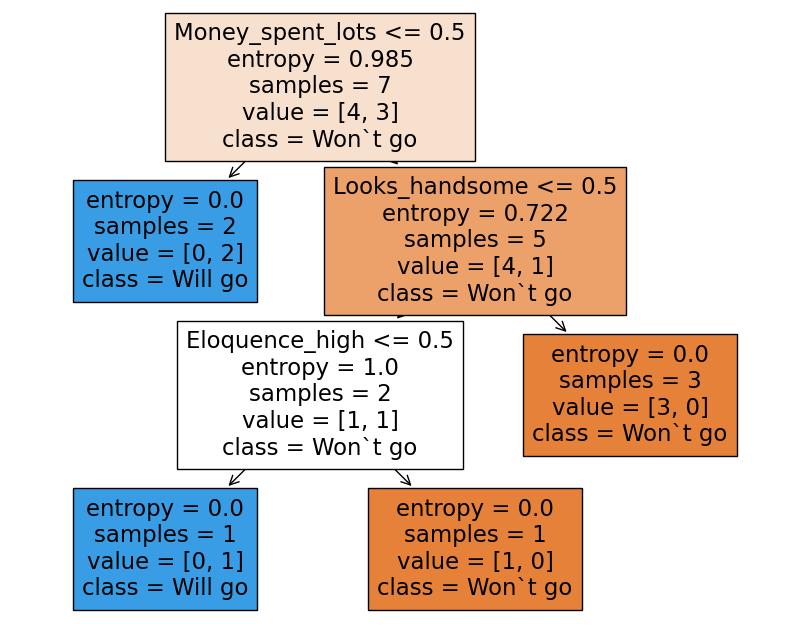

In [11]:
tree.plot_tree(dt, feature_names=df_train.columns.to_list(), filled=True, class_names=['Won`t go', 'Will go'])

In [12]:
# Part 2. Functions for calculating entropy and information gain.

In [13]:
balls = [1 for i in range(9)] + [0 for i in range(11)]
balls_left = [1 for i in range(8)] + [0 for i in range(5)]
balls_right = [1 for i in range(1)] + [0 for i in range(6)]


In [14]:
from math import log

def entropy(a_list):
    lst = list(a_list)
    size = len(lst)
    entropy =  0
    set_elements = len(set(lst))
    if set_elements in [0, 1]:
        return 0 
    for i in set(lst):
        occ = lst.count(i)
        entropy -= occ / size * log(occ / size, 2)
    return entropy

print(entropy(balls))  # 9 blue and 11 yellow ones
print(entropy(balls_left))  # 8 blue and 5 yellow ones
print(entropy(balls_right))  # 1 blue and 6 yellow ones
print(entropy([1, 2, 3, 4, 5, 6]))  # entropy of a fair 6-sided die
        

0.9927744539878084
0.961236604722876
0.5916727785823275
2.584962500721156


In [15]:
# Part 3. The adult dataset

In [143]:
data_train = pd.read_csv('data/adult_train.csv', sep=',')
data_train.tail()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [144]:
data_test = pd.read_csv('data/adult_test.csv', sep=',')
data_test.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [145]:
data_train = data_train[data_train['Target'] != 'NaN']
data_test = data_test[data_test['Target'] != 'NaN'].dropna()
data_test[['Target']] = data_test[['Target']].replace(['<=50K', '>50K'],[0,1], regex=True).astype(int)
data_train[['Target']] = data_train[['Target']].replace(['<=50K','>50K'],[0,1], regex=True)

In [106]:
data_test.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,15060,73,35,444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Workclass,15060,7,Private,11021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,15060.0,NaN,NaN,NaN,189616.370252,105615.006523,13492.0,116655.0,177955.0,238588.75,1490400.0
Education,15060,16,HS-grad,4943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Num,15060.0,NaN,NaN,NaN,10.112749,2.558727,1.0,9.0,10.0,13.0,16.0
Martial_Status,15060,7,Married-civ-spouse,6990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,15060,14,Exec-managerial,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,15060,6,Husband,6203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,15060,5,White,12970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,15060,2,Male,10147,NaN,NaN,NaN,NaN,NaN,NaN,NaN


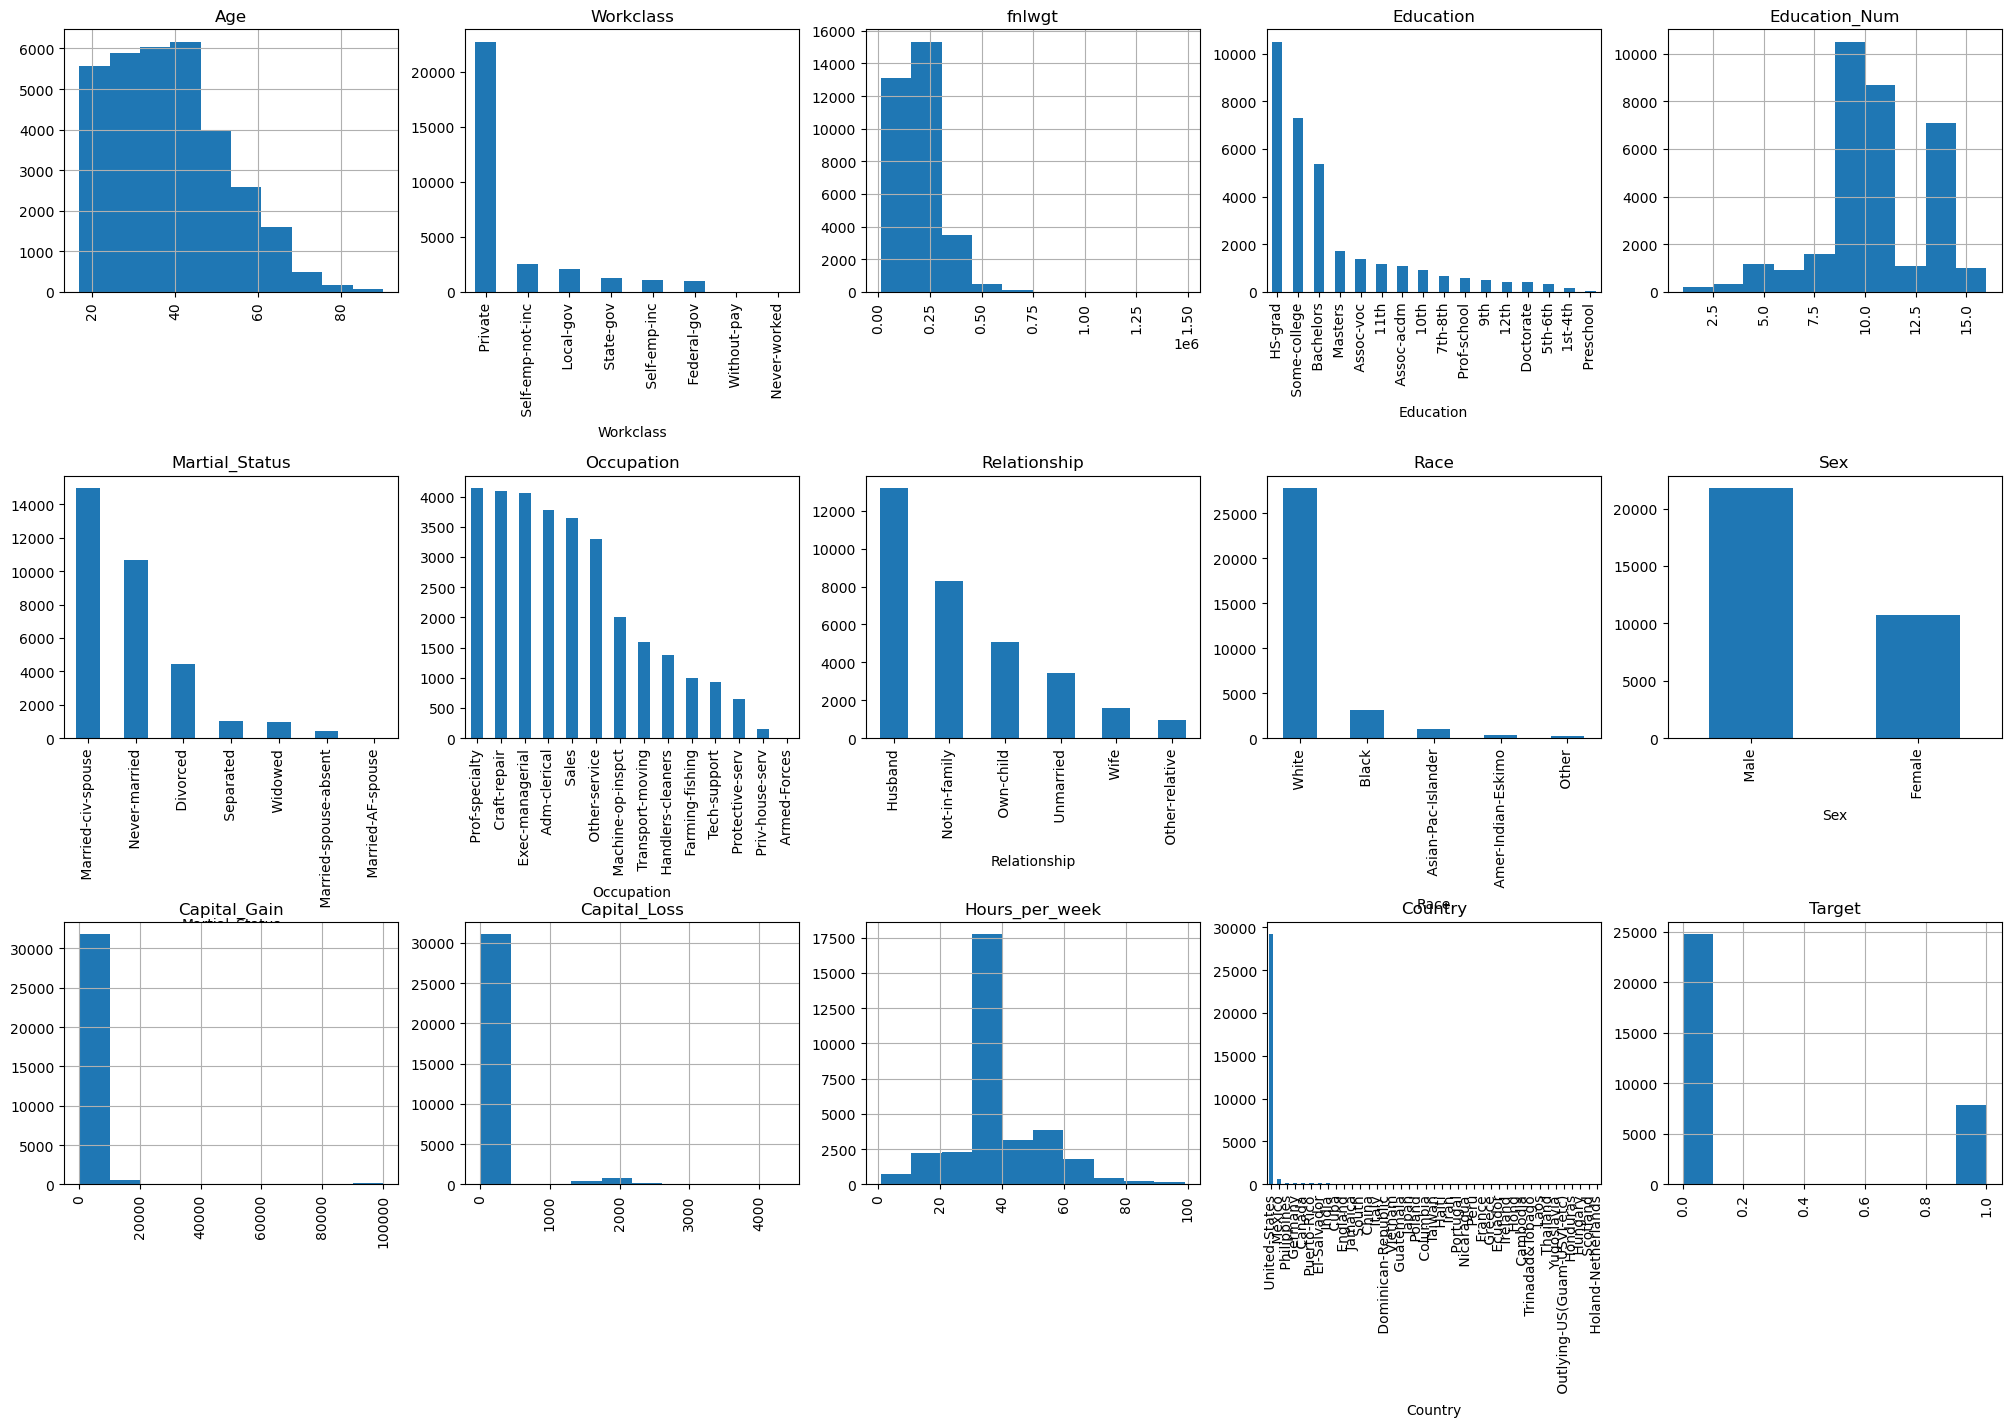

In [110]:
fig = plt.figure(figsize = (25, 15))
cols = 5
rows = int(data_train.shape[1]/cols)
for i, column in enumerate(data_train.columns):
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(column)
    if data_train.dtypes[column] == object:
        data_train[column].value_counts().plot(kind='bar', axes=ax)
    else:
        data_train[column].hist(axes=ax)
        plt.xticks(rotation='vertical')
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [149]:
data_test['Age'] = data_test['Age'].astype('int64')
data_test['fnlwgt'] = data_test['fnlwgt'].astype('int64')
data_test['Education_Num'] = data_test['Education_Num'].astype('int64')
data_test['Capital_Gain'] = data_test['Capital_Gain'].astype('int64')
data_test['Capital_Loss'] = data_test['Capital_Loss'].astype('int64')
data_test['Hours_per_week'] = data_test['Hours_per_week'].astype('int64')
data_test['Target'] = data_test['Target'].astype('int64')

In [150]:
y_train = data_train.pop('Target')
y_test = data_test.pop('Target')

In [129]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Martial_Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Country         31978 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [133]:
categorical_columns = []
numerical_columns = []
for i in data_train.columns:
    if data_train[i].dtype.name == 'object':
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)

print('categorical_columns', categorical_columns)
print('numerical_columns', numerical_columns)

categorical_columns ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']
numerical_columns ['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week']


In [154]:
for i in categorical_columns:
    data_train[i].fillna(data_train[i].mode()[0], inplace=True)
    data_test[i].fillna(data_train[i].mode()[0], inplace=True)
    
for i in numerical_columns:
    data_train[i].fillna(data_train[i].median(), inplace=True)
    data_test[i].fillna(data_train[i].median(), inplace=True)


In [158]:
data_train = pd.concat([data_train[numerical_columns], pd.get_dummies(data_train[categorical_columns])], axis=1)
data_test = pd.concat([data_test[numerical_columns], pd.get_dummies(data_test[categorical_columns])], axis=1)

In [164]:
data_test[['Country_ Holand-Netherlands', 'Workclass_ Never-worked']] = 0

In [166]:
set(data_train.columns) - set(data_test.columns)

set()

In [171]:
data_train.head(10)

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,37,284582,14,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,49,160187,5,0,0,16,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,52,209642,9,0,0,45,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,31,45781,14,14084,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9,42,159449,13,5178,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [169]:
data_train, data_test = data_train.replace([True, False],[1, 0]), data_test.replace([True, False],[1, 0])

In [198]:
# 3.1 Decision tree without parameter tuning. Train a decision tree (DecisionTreeClassifier)
# with a maximum depth of 3, and evaluate the accuracy metric on the test data. Use parameter random_state = 17 for results reproducibility.
clf_tree = DecisionTreeClassifier(criterion = 'entropy',random_state = 17, max_depth = 3)
clf_tree.fit(data_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

In [188]:
tree_predictions = clf_tree.predict(data_test[data_train.columns])
accuracy_score(y_test, tree_predictions)

0.8392430278884462

In [203]:
# 3.2 Decision tree without parameter tuning. Train a decision tree (DecisionTreeClassifier, random_state = 17).
# Find the optimal maximum depth using 5-fold cross-validation (GridSearchCV).
tree_params = {'max_depth': range(2,11)}

locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17), tree_params, cv=5, n_jobs=-1, verbose=True)
locally_best_tree.fit(data_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': range(2, 11)}, verbose=True)

In [204]:
tree_predictions = locally_best_tree.predict(data_test[data_train.columns])
accuracy_score(y_test, tree_predictions)

0.8531872509960159

In [205]:
print('Best params', locally_best_tree.best_params_)
print('Best params', locally_best_tree.best_score_)

Best params {'max_depth': 9}
Best params 0.8565770273854106


In [208]:
tuned_tree = DecisionTreeClassifier(random_state=17, max_depth=9)
tuned_tree.fit(data_train, y_train)
tuned_tree_pred = tuned_tree.predict(data_test[data_train.columns])
accuracy_score(y_test, tuned_tree_pred)

0.8531872509960159

In [209]:
# 3.3 (Optional) Random forest without parameter tuning
rf = RandomForestClassifier(random_state=17, n_estimators = 100, n_jobs=-1)
rf.fit(data_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=17)

In [210]:
%%time
cv_score = cross_val_score(rf, data_train, y_train, cv=3)

CPU times: total: 2.05 s
Wall time: 7.87 s


In [211]:
cv_score, cv_score.mean()

(array([0.85194398, 0.85572139, 0.859578  ]), 0.8557477912289437)

In [215]:
rf_pred = rf.predict(data_test[data_train.columns])
accuracy_score(y_test, rf_pred)

0.84734395750332

In [216]:
# 3.4 (Optional) Random forest with parameter tuning

forest_params = {'max_depth': (10,16), 'max_features': range(5, 105, 20)}

locally_best_forest = GridSearchCV(
    RandomForestClassifier(n_estimators = 10, random_state = 17, n_jobs = -1),
    forest_params,
    cv=3,
    verbose=1
)

locally_best_forest.fit(data_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=10, n_jobs=-1,
                                              random_state=17),
             param_grid={'max_depth': (10, 16),
                         'max_features': range(5, 105, 20)},
             verbose=1)

In [217]:
print("Best params:", locally_best_forest.best_params_)
print("Best cross validaton score", locally_best_forest.best_score_)

Best params: {'max_depth': 16, 'max_features': 45}
Best cross validaton score 0.8603852541526957
